In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
ls german-traffic-signs/

signnames.csv  test.p  train.p  valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels'] 
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']  

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "the no of images is not equal to no of labels"
assert(X_val.shape[0] == y_val.shape[0]), "the no of images is not equal to no of labels"
assert(X_test.shape[0] == y_test.shape[0]), "the no of images is not equal to no of labels"
assert(X_train.shape[1:] == (32,32,3)), "dimensions are not 32, 32, 3"
assert(X_val.shape[1:] == (32,32,3)), "dimensions are not 32, 32, 3"
assert(X_test.shape[1:] == (32,32,3)), "dimensions are not 32, 32, 3"

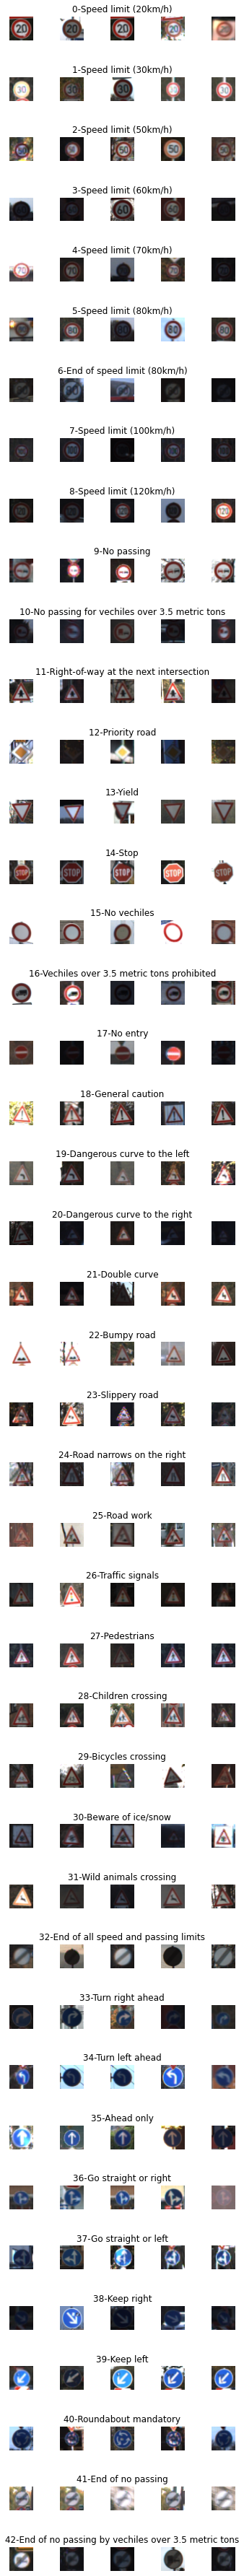

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')


num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + "-" + row['SignName'])
        num_of_samples.append(len(x_selected))

        #indes,series

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


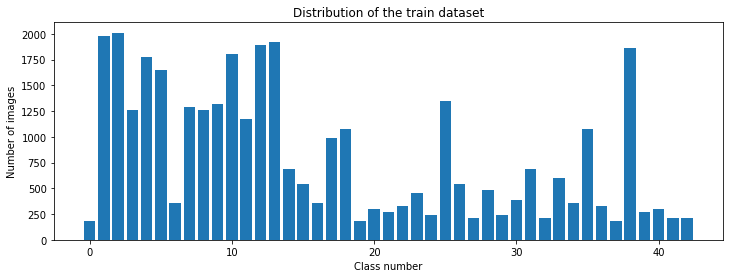

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


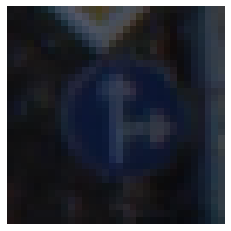

In [ ]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(-0.5, 31.5, 31.5, -0.5)

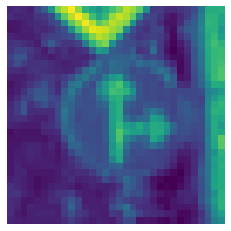

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')

(32, 32)


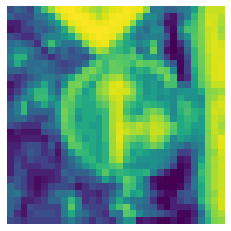

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


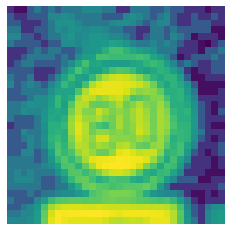

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410,32,32,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1, 
                   height_shift_range = 0.1,
                   zoom_range = 0.2,
                   shear_range = 0.1,
                   rotation_range = 10)
datagen.fit(X_train)

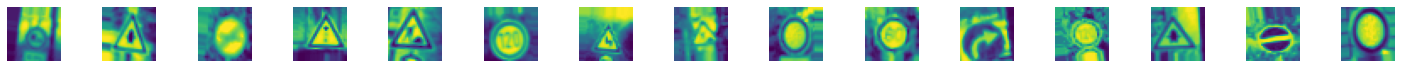

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)


In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape = (32,32,1), activation = 'relu'  ))
  model.add(Conv2D(60, (5,5),  activation = 'relu'  ))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(30, (3,3), activation ='relu'))
  model.add(Conv2D(30, (3,3), activation ='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation ='softmax'))
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 60), steps_per_epoch = 500, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
500/500 [==============================] - 10s 20ms/step - loss: 2.0920 - accuracy: 0.4122 - val_loss: 0.3947 - val_accuracy: 0.8701
Epoch 2/10
500/500 [==============================] - 10s 19ms/step - loss: 0.6714 - accuracy: 0.7933 - val_loss: 0.1615 - val_accuracy: 0.9528
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 0.3929 - accuracy: 0.8794 - val_loss: 0.1052 - val_accuracy: 0.9671
Epoch 4/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2946 - accuracy: 0.9086 - val_loss: 0.1049 - val_accuracy: 0.9689
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2348 - accuracy: 0.9272 - val_loss: 0.0836 - val_accuracy: 0.9766
Epoch 6/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2047 - accuracy: 0.9360 - val_loss: 0.0824 - val_accuracy: 0.9778
Epoch 7/10
500/500 [==============================] - 10s 20

Text(0.5, 0, 'epochs')

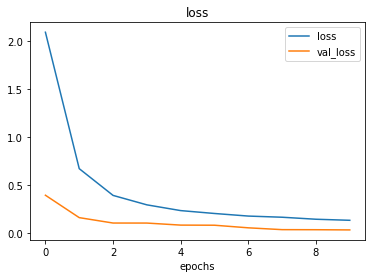

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

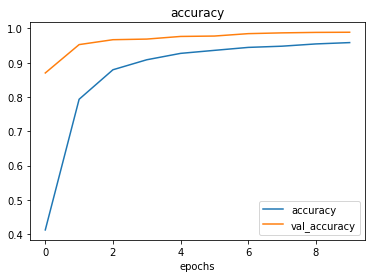

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title("accuracy")
plt.xlabel("epochs")

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('test score:', score[0])
print('test accuracy:', score[1])

test score: 0.152617946267128
test accuracy: 0.9619160890579224


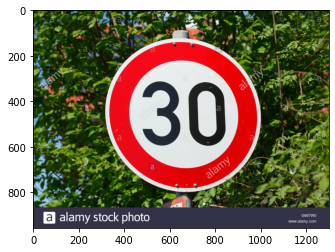

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

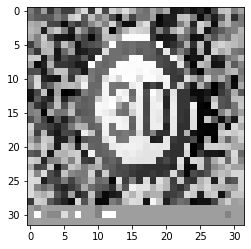

In [ ]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
img = img.reshape(1, 32, 32, 1)

In [ ]:
prediction = model.predict_classes(img)
print("predicted sign:", str(prediction))

predicted sign: [1]


In [ ]:
'''https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'''

